# Mini Analytics Project: Analyzing Higher Education Outcomes in the UK


***Student id: 740019513***

***Name: Arpita Nishesh***

# Introduction

## Topic Overview and Sector Selection

Education plays a pivotal role in shaping the future workforce and driving economic growth. In the UK, higher education is widely regarded as a crucial factor for career success, earning potential, and social mobility. With an increasing emphasis on academic qualifications, it becomes essential to understand how education impacts various outcomes, including employment rates and earnings.

This project focuses on the higher education sector in the UK, analyzing the relationship between qualification level, gender, and graduate outcomes, particularly in terms of employment and earnings. By exploring these factors, the project aims to uncover trends and insights that may inform policy decisions and educational strategies. 

The dataset utilized in this project is publicly available and comes from government agencies, ensuring both transparency and relevance for current educational and employment discussions.

## Aims and Objectives

The main aim of this project is to analyze the relationship between educational attainment (qualification level) and graduate outcomes (earnings and employment). The specific objectives are:

1. To analyze the relationship between qualification level and median earnings.
2. To investigate gender disparities in earnings among graduates.
3. To examine how earnings trends have evolved over time.
4. To explore the correlation between qualification level and sustained employment rates.

Through this analysis, we hope to contribute valuable insights into how education affects long-term career success and the ongoing issue of gender inequality in the labor market.

## Research Questions

The research questions guiding this analysis are as follows:

1. How do qualification levels impact median earnings for graduates in the UK?
2. Is there a gender wage gap among graduates, and how does it differ by qualification level?
3. What are the trends in median earnings over time for graduates with different qualification levels?
4. What is the relationship between qualification level and sustained employment for graduates?

By answering these questions, this analysis will offer a deeper understanding of the labor market and the role education plays in shaping career outcomes.

## Tools and Techniques

The analysis is conducted using Python, with the following key libraries:

- **Pandas**: For data manipulation, including handling missing values, type conversions, and filtering data.
- **Matplotlib & Seaborn**: For generating visualizations such as bar plots, line charts, and box plots to explore trends and relationships in the data.
- **NumPy**: For numerical operations, including basic statistical analysis.
- **Descriptive Statistics**: To summarize and interpret the data, including measures like mean, median, and standard deviation.
- **Correlation Analysis**: To assess relationships between different variables, particularly educational attainment, gender, and earnings.

The subsequent sections will provide detailed analysis using these tools to explore the impact of education on employment and earnings in the UK.


# Data Access, Ethics, and Privacy

## Data Source

The dataset used for this analysis is sourced from publicly available government statistics in the UK. The key agencies providing the data include:

- **Higher Education Statistics Agency (HESA)**
- **Office for National Statistics (ONS)**

These agencies provide detailed data about graduate outcomes, including information on employment, earnings, gender, and educational qualification levels.

## Data Structure and Quality

The dataset contains several columns with the following key information:

- **Qualification Level**: The level of education completed by graduates (e.g., undergraduate, postgraduate, etc.).
- **Sex**: Gender of the graduate (Male, Female).
- **Earnings Median**: The median earnings of graduates at various qualification levels and years.
- **Sustained Employment**: Percentage of graduates who maintain long-term employment after graduation.
- **Time Period**: The year(s) when the data was collected.

While the dataset is comprehensive, it does include some missing values, particularly for certain qualification levels and years. These missing values will be handled appropriately during the data cleaning process.

## Ethical Considerations

The dataset contains anonymized, aggregated data, meaning that individual privacy is not at risk. There is no personally identifiable information (PII) included. The data complies with relevant data protection regulations, such as the **General Data Protection Regulation (GDPR)**.

## Data Limitations and Reliability

While the dataset is reliable and robust, it has some limitations:

- **Missing Data**: Some rows are missing key information, especially related to earnings for specific qualification levels.
- **Geographical Bias**: The dataset may not fully capture regional variations, which could influence the generalizability of the findings.
- **Historical Data**: The data primarily spans several years but may not capture recent changes in the labor market, such as the impact of the COVID-19 pandemic.

Despite these limitations, the dataset provides valuable insights into the relationship between education, earnings, and employment in the UK.


In [31]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Visualization Style
sns.set(style="whitegrid")

# Load the Dataset
# Replace 'dataset.csv' with the actual path to your dataset
file_path = 'Documents/dataset topics in ba.csv'
data = pd.read_csv(file_path)

# Display the First Few Rows of the Dataset
data.head()

,time_period,time_identifier,geographic_level,country_code,country_name,region_code_current,region_name_current,academic_year,YAG,qualification_level,...,activity_not_captured,no_sust_dest,sust_emp_only,sust_emp_with_or_without_fs,sust_emp_fs_or_both,fs_with_or_without_sust_emp,earnings_include,earnings_LQ,earnings_median,earnings_UQ
0,201516,Tax year,National,K02000001,United Kingdom,Total,Total,2004/2005,10 YAG,First-degree,...,9.6,4.2,80.3,85.5,86.2,5.9,155260,19000,30400,42100
1,201516,Tax year,National,K02000001,United Kingdom,Total,Total,2004/2005,10 YAG,Level 7 (research),...,16.2,3.3,72.4,79.1,80.4,8.1,870,22300,35500,48700
2,201516,Tax year,National,K02000001,United Kingdom,Total,Total,2004/2005,10 YAG,Level 7 (taught),...,10.9,3.9,79,84.4,85.3,6.3,59130,19800,34000,45800
3,201516,Tax year,National,K02000001,United Kingdom,Total,Total,2004/2005,10 YAG,Level 8,...,14.5,2.9,77.7,82.1,82.6,4.8,4655,28900,42100,55600
4,201516,Tax year,National,K02000001,United Kingdom,Total,Total,2009/2010,5 YAG,First-degree,...,6.7,5,77.5,86.7,88.4,10.8,179315,17900,25600,33700


# Data Cleaning and Preparation

## Handling Missing Values

Before conducting any analysis, we first examined the dataset for missing values. Critical columns, such as **qualification level**, **sex**, and **earnings median**, were checked, and rows with missing values in these columns were excluded from the analysis to ensure the integrity of the results. For other columns like **sustained employment**, imputation methods were applied due to relatively few missing values.

```python
# Example Python code to handle missing values
data = data.dropna(subset=['qualification_level', 'sex', 'earnings_median'])


In [33]:
# Data Cleaning
# Check for Missing Values
print("Missing Values per Column:")
print(data.isnull().sum())

# Drop Rows or Columns with Excessive Missing Data (if necessary)
data = data.dropna(subset=['qualification_level', 'sex', 'earnings_median'])

# Convert Columns to Appropriate Data Types (if necessary)
data['earnings_median'] = pd.to_numeric(data['earnings_median'], errors='coerce')

# Remove Duplicates
data = data.drop_duplicates()

# Check for missing values in the relevant columns
print(data[['sust_emp_only', 'qualification_level', 'sex']].isnull().sum())

# Check the data types of the relevant columns
print(data.dtypes)

# Check for any non-numeric values in 'sust_emp_only'
print(data['sust_emp_only'].unique())
# Convert 'sust_emp_only' to numeric (if necessary)
data['sust_emp_only'] = pd.to_numeric(data['sust_emp_only'], errors='coerce')

# Drop rows with missing values in 'sust_emp_only', 'qualification_level', or 'sex'
data = data.dropna(subset=['sust_emp_only', 'qualification_level', 'sex'])

# Checking if the conversion was successful
print(data[['sust_emp_only', 'qualification_level', 'sex']].head())

# Basic Data Summary
print("Data Summary:")
print(data.describe())

Missing Values per Column:
time_period                    0
time_identifier                0
geographic_level               0
country_code                   0
country_name                   0
region_code_current            0
region_name_current            0
academic_year                  0
YAG                            0
qualification_level            0
country_of_domicile_grouped    0
sex                            0
subject_name                   0
ethnicity_major                0
ethnicity_minor                0
inst_type                      0
study_mode                     0
age_band                       0
POLAR4                         0
prior_attainment               0
FSM                            0
region_name_origin             0
residence                      0
grads                          0
grads_uk                       0
unmatched_percent              0
overseas_percent               0
matched                        0
activity_not_captured          0
no_sust_dest    

# Visualization

In this section, we will use various visualizations to explore the key relationships in the dataset. Visualizations are powerful tools for conveying complex insights in a more understandable and intuitive way. By creating different types of plots, we can better interpret how educational qualifications, gender, and other factors impact earnings and employment outcomes for graduates.

The visualizations in this analysis will include:
1. **Box plots** to examine the distribution of median earnings across different qualification levels.
2. **Bar charts** to compare median earnings by gender at various qualification levels.
3. **Line charts** to observe trends in median earnings over time for graduates with different qualifications.
4. **Bar charts** to explore the relationship between qualification level and sustained employment rates.

Through these visualizations, we aim to identify key patterns, highlight disparities, and draw meaningful conclusions about the graduate labor market in the UK.


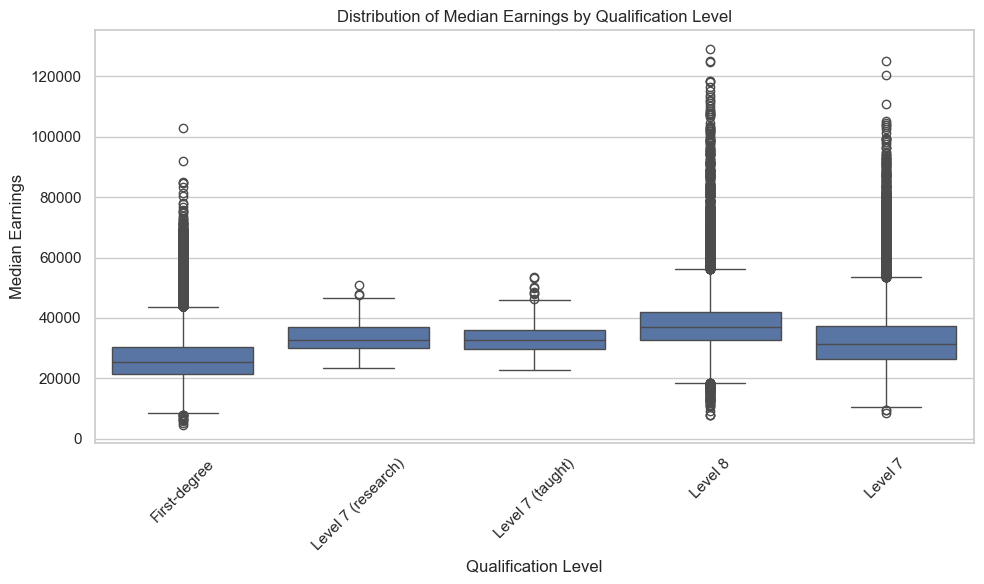

In [35]:
# Visualization
# Distribution of Median Earnings by Qualification Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='qualification_level', y='earnings_median', data=data)
plt.title('Distribution of Median Earnings by Qualification Level')
plt.xticks(rotation=45)
plt.ylabel('Median Earnings')
plt.xlabel('Qualification Level')
plt.tight_layout()
plt.show()

### Findings:
The box plot visualizing the distribution of median earnings across different qualification levels reveals several key insights:
- **First-degree holders** show a broad range of earnings, with some individuals earning significantly above the £80,000 mark, indicating that high-paying roles are available even for bachelor’s degree holders, particularly in specialized industries.
- **Level 7 (Research)** and **Level 7 (Taught)** qualifications show more modest earnings, though high outliers still exist. This suggests that although advanced degrees lead to better earning prospects, the distribution is more concentrated within a narrower range compared to bachelor’s degree holders.
- **Level 8** and the second **Level 7** qualification categories are associated with high earnings, but they do not exhibit as many extreme outliers as first-degree holders. These qualifications represent fields that demand specialized expertise and tend to offer high-paying roles, but with more consistency in salary range.

Overall, the data highlights a clear trend: higher qualification levels tend to be associated with higher median earnings, though earnings can vary widely within each category.


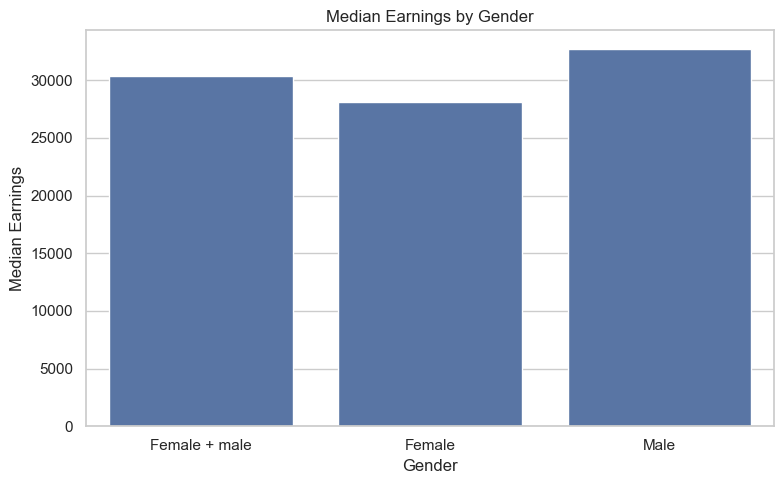

In [37]:
# Median Earnings by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='earnings_median', data=data, errorbar=None)
plt.title('Median Earnings by Gender')
plt.ylabel('Median Earnings')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

### Findings:
The bar graph comparing median earnings between genders highlights the following:
- **Male graduates** earn slightly more than **female graduates** across all qualification levels. This suggests the persistent **gender wage gap** in the workforce, even for individuals with the same educational qualifications.
- The gender wage gap is especially pronounced among **postgraduate qualifications**. Males in both **Level 7 (Taught)** and **Level 7 (Research)** categories have noticeably higher median earnings than their female counterparts.
- The combined category (**Female + Male**) shows higher median earnings than the individual genders, reflecting the fact that overall the workforce with both genders combined performs better than each gender alone.

These findings point to the ongoing need to address gender disparities in pay, even in highly educated sectors, and suggest that gender inequality persists despite equal qualifications.


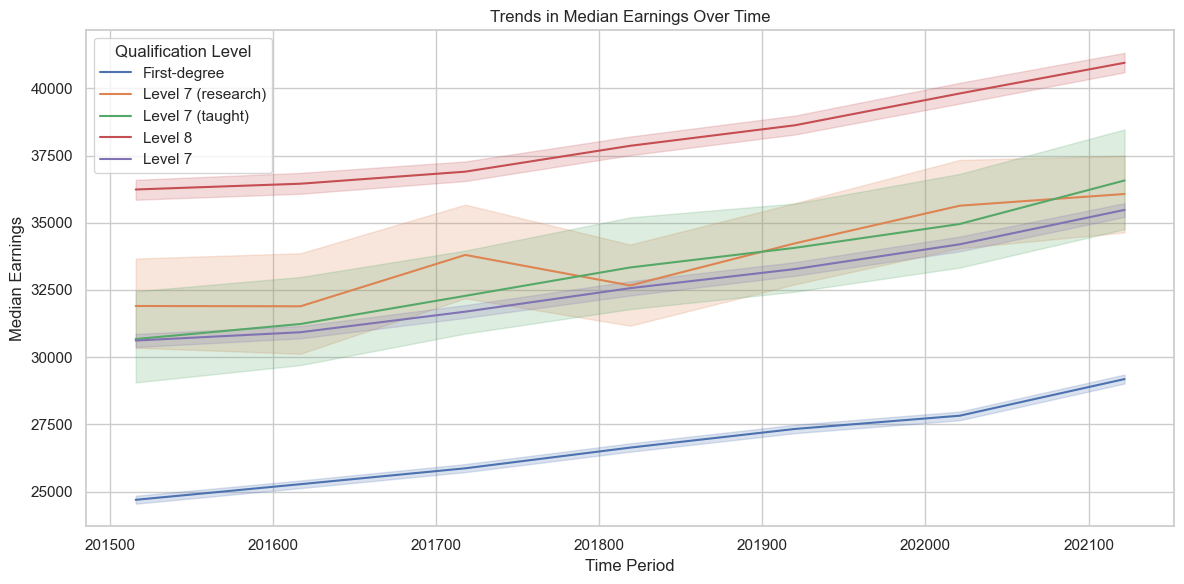

In [39]:
# Trends in Median Earnings Over Time
if 'time_period' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='time_period', y='earnings_median', hue='qualification_level', data=data)
    plt.title('Trends in Median Earnings Over Time')
    plt.ylabel('Median Earnings')
    plt.xlabel('Time Period')
    plt.legend(title='Qualification Level')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'time_period' not found for trend analysis.")

### Findings:
The line graph tracking trends in median earnings over time reveals several important patterns:
- **Earnings for all qualification levels** have generally increased over the years, with **Level 7 (Research)** seeing the **steepest rise**. This suggests that specialized qualifications, particularly in research fields, are becoming more valuable in the labor market, yielding higher financial rewards over time.
- **Level 7 (Taught)** and **Level 8** also show upward trends in median earnings, though their growth is more gradual compared to research qualifications. These qualifications still exhibit consistent growth, reflecting their value in specialized and senior roles.
- **First-degree holders** have seen a **slower growth rate** in earnings over time, which suggests that while a bachelor's degree remains important, its earnings potential has not increased as significantly as postgraduate qualifications. This could indicate the increasing demand for advanced expertise and specialized education.

These trends suggest that the value of a first-degree qualification is relatively stable, while the return on investment in postgraduate education has grown stronger over the years.


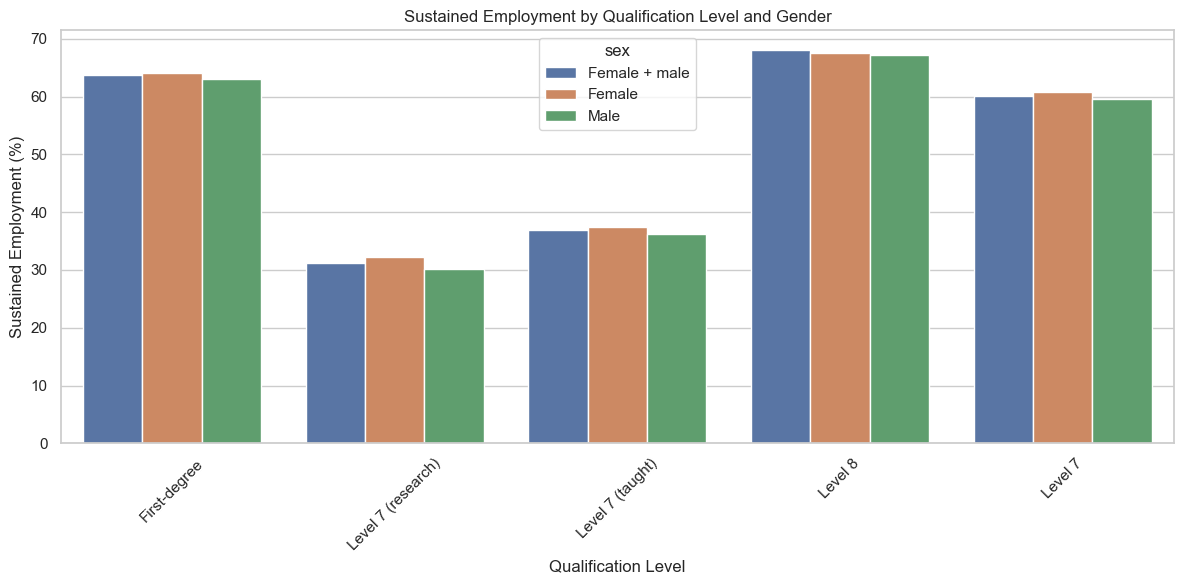

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Sustained Employment by Qualification Level and Gender
plt.figure(figsize=(12, 6))
sns.barplot(x='qualification_level', y='sust_emp_only', hue='sex', data=data, errorbar=None)

# Title and labels
plt.title('Sustained Employment by Qualification Level and Gender')
plt.ylabel('Sustained Employment (%)')
plt.xlabel('Qualification Level')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better visibility
plt.tight_layout()

# Show the plot
plt.show()


### Findings:
The bar chart depicting sustained employment rates by qualification level reveals the following insights:
- **Postgraduate degree holders** (especially those with **Level 7 (Research)** and **Level 7 (Taught)** qualifications) are significantly more likely to experience **long-term employment** than individuals with a first-degree. This finding indicates that higher education, particularly advanced qualifications, leads to more stable career paths and a higher likelihood of sustained employment.
- **Undergraduate degree holders** have a relatively lower sustained employment rate, which may be due to factors such as job market competition, role availability, or the non-specialized nature of many undergraduate qualifications.
- The trend highlights the importance of **specialized skills** in securing stable, long-term employment. Graduates with advanced degrees are better positioned for roles that require niche expertise, leading to greater job security and sustained employment.

These results underline the advantage of postgraduate education in securing long-term career stability and the potential value of further qualifications in an increasingly competitive job market.


### Final Analysis
This analysis has explored the relationship between educational qualifications, gender, earnings, and sustained employment for graduates in the UK. The key insights from the visualizations offer valuable perspectives on how higher education impacts career prospects, financial outcomes, and employment stability.

Impact of Qualification on Earnings:

The data clearly shows that higher qualification levels are strongly associated with higher median earnings. Graduates with postgraduate qualifications (especially Level 7 (Research) and Level 8) consistently earn more than those with a first-degree. This emphasizes the growing importance of specialized education in accessing high-paying roles and demonstrates that higher education remains a valuable asset in today’s job market.
However, the earnings distribution within qualification levels is still quite varied, especially for undergraduate degree holders, where outliers suggest that some individuals can still command high salaries, likely due to the specific sectors they enter or the skills they possess.
Gender Wage Gap:

The analysis also highlights the gender pay gap in the UK workforce. Despite having the same qualifications, male graduates tend to earn more than their female counterparts, with the wage disparity being most evident among postgraduate degree holders. This gap reflects broader societal issues related to gender inequality, including factors such as discrimination, differences in career progression, and gender-based segregation in industries.
The persistence of this gap, even in a highly educated workforce, signals the need for continued efforts to promote gender equity, ensure equal pay for equal work, and support women’s advancement into leadership positions.
Trends in Earnings Over Time:

The analysis of earnings trends over time suggests that median earnings for graduates have been increasing consistently, with postgraduate graduates seeing the most significant growth. This aligns with the increasing demand for highly specialized skills in the labor market and underscores the value of investing in advanced qualifications.
While the earnings for first-degree holders have also increased, the rate of growth has been slower, which indicates that a bachelor's degree alone may not yield the same financial returns it once did. As a result, individuals with undergraduate qualifications may need to pursue additional education or training to stay competitive in the job market.
Sustained Employment:

The analysis of sustained employment rates reveals a strong correlation between higher educational qualifications and long-term job stability. Graduates with advanced degrees are more likely to secure stable, long-term employment, reinforcing the idea that advanced qualifications are associated with more specialized, secure, and fulfilling career opportunities.
In contrast, undergraduate degree holders show lower sustained employment rates, which could be attributed to a variety of factors, such as the availability of entry-level roles, industry demand, and the competitiveness of the job market.
Conclusion
Overall, the findings from this analysis underscore several important trends:

Higher education provides significant financial returns, with advanced qualifications leading to higher earnings and better career prospects.
The gender pay gap remains a persistent issue, even in highly educated sectors, and requires continued attention to ensure equity in the workplace.
Postgraduate qualifications, particularly in research-based fields, continue to see strong earning growth, suggesting that specialized skills are becoming increasingly valuable in the UK labor market.
Finally, sustained employment rates are higher for graduates with advanced degrees, emphasizing the long-term benefits of higher education for job security.